In [11]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install statsmodels

In [12]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.4 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 가상의 센서 데이터 생성 함수
def generate_sensor_data_for_one_day(date, num_entries):
    timestamps = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:00", freq='H').to_pydatetime().tolist()
    sensor_data = {
        'timestamp': np.random.choice(timestamps, size=num_entries, replace=True),
        'sensor_id': np.random.choice(['sensor_1', 'sensor_2', 'sensor_3'], size=num_entries),
        'event_type': np.random.choice(['motion', 'door_open', 'light_on'], size=num_entries),
        'location': np.random.choice(['living_room', 'bedroom', 'kitchen'], size=num_entries)
    }
    return pd.DataFrame(sensor_data)

# 데이터 생성 (2023년 1월 1일 하루 동안)
date = "2023-01-01"
data = generate_sensor_data_for_one_day(date, 24)

# 타임스탬프 정렬
data = data.sort_values('timestamp').reset_index(drop=True)
print(data)


             timestamp sensor_id event_type     location
0  2023-01-01 00:00:00  sensor_2     motion      bedroom
1  2023-01-01 00:00:00  sensor_2  door_open      kitchen
2  2023-01-01 03:00:00  sensor_1     motion      bedroom
3  2023-01-01 03:00:00  sensor_1  door_open  living_room
4  2023-01-01 04:00:00  sensor_2     motion      bedroom
5  2023-01-01 04:00:00  sensor_1  door_open      bedroom
6  2023-01-01 05:00:00  sensor_2  door_open      bedroom
7  2023-01-01 06:00:00  sensor_1  door_open      kitchen
8  2023-01-01 07:00:00  sensor_3     motion  living_room
9  2023-01-01 08:00:00  sensor_2     motion      kitchen
10 2023-01-01 08:00:00  sensor_3   light_on      kitchen
11 2023-01-01 09:00:00  sensor_1   light_on      kitchen
12 2023-01-01 10:00:00  sensor_2  door_open      bedroom
13 2023-01-01 10:00:00  sensor_1     motion  living_room
14 2023-01-01 10:00:00  sensor_2     motion  living_room
15 2023-01-01 10:00:00  sensor_2   light_on  living_room
16 2023-01-01 11:00:00  sensor_

/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_63971/2465197900.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:00", freq='H').to_pydatetime().tolist()


In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 시간대별 이벤트 발생 빈도를 시각화
hourly_activity.plot(kind='bar', figsize=(10, 6))
plt.title('Hourly Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.show()

# 시계열 모델을 이용한 패턴 예측 (ARIMA 모델)
model = ARIMA(hourly_activity, order=(1, 1, 1))
model_fit = model.fit()

# 예측 결과
forecast = model_fit.forecast(steps=24)
print(forecast)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(hourly_activity.index, hourly_activity, label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Hourly Activity Forecast')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
#plt.legend()
plt.show()


NameError: name 'hourly_activity' is not defined

/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_82719/2592979658.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:00", freq='H').to_pydatetime().tolist()


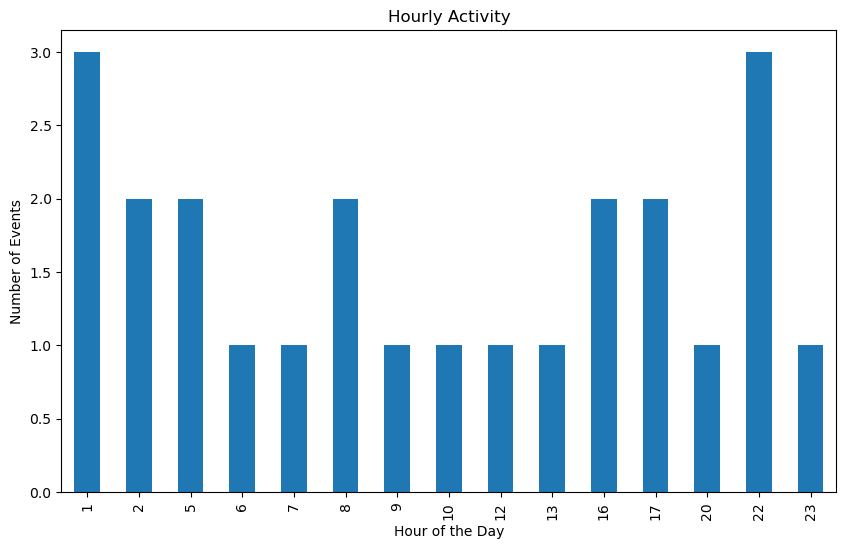

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                        SARIMAX   Log Likelihood                 -16.185
Date:                Tue, 03 Sep 2024   AIC                             36.370
Time:                        01:09:22   BIC                             37.786
Sample:                             0   HQIC                            36.355
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6000      0.245      6.525      0.000       1.119       2.081
sigma2         0.5067      0.306      1.653      0.098      -0.094       1.107
Ljung-Box (L1) (Q):                   0.10   Jarque-

/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


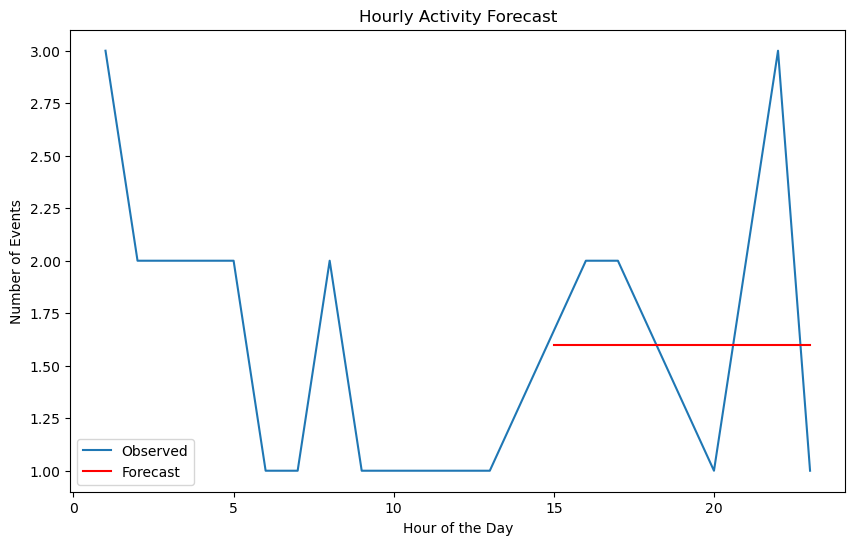

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

# 가상의 센서 데이터 생성 함수
def generate_sensor_data_for_one_day(date, num_entries):
    timestamps = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:00", freq='H').to_pydatetime().tolist()
    sensor_data = {
        'timestamp': np.random.choice(timestamps, size=num_entries, replace=True),
        'sensor_id': np.random.choice(['sensor_1', 'sensor_2', 'sensor_3'], size=num_entries),
        'event_type': np.random.choice(['motion', 'door_open', 'light_on'], size=num_entries),
        'location': np.random.choice(['living_room', 'bedroom', 'kitchen'], size=num_entries)
    }
    return pd.DataFrame(sensor_data)

# 데이터 생성 (2023년 1월 1일 하루 동안)
date = "2023-01-01"
data = generate_sensor_data_for_one_day(date, 24)

# 시간대별 이벤트 발생 빈도 계산
data['hour'] = data['timestamp'].dt.hour
hourly_activity = data.groupby('hour').size()

# 시간대별 이벤트 발생 빈도를 시각화
hourly_activity.plot(kind='bar', figsize=(10, 6))
plt.title('Hourly Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.show()

# auto_arima를 사용하여 최적의 ARIMA 모델 찾기
model = pm.auto_arima(hourly_activity, seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())

# 예측 결과 (24시간 예측)
forecast = model.predict(n_periods=24)

# 예측 시간대를 0시부터 23시까지로 맞춤
forecast_index = np.arange(0, 24)
forecast_series = pd.Series(forecast, index=forecast_index)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(hourly_activity.index, hourly_activity, label='Observed')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.title('Hourly Activity Forecast')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.legend()
plt.show()


In [3]:
!pip install --upgrade setuptools wheel Cython
!pip install pystan==2.19.1.1
!pip install fbprophet


  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      /private/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/pip-install-7trlbap7/pystan_4adb92e55c344a979048cf92206ea898/setup.py:61: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
        self.version = node.value.s
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.meta

In [5]:
!pip install Prophet

In [6]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.0 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pystan-3.7.0-py3-none-any.wh

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Prophet

# 가상의 센서 데이터 생성 함수
def generate_sensor_data_for_one_day(date, num_entries):
    timestamps = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:00", freq='H').to_pydatetime().tolist()
    sensor_data = {
        'timestamp': np.random.choice(timestamps, size=num_entries, replace=True),
        'sensor_id': np.random.choice(['sensor_1', 'sensor_2', 'sensor_3'], size=num_entries),
        'event_type': np.random.choice(['motion', 'door_open', 'light_on'], size=num_entries),
        'location': np.random.choice(['living_room', 'bedroom', 'kitchen'], size=num_entries)
    }
    return pd.DataFrame(sensor_data)

# 데이터 생성 (2023년 1월 1일 하루 동안)
date = "2023-01-01"
data = generate_sensor_data_for_one_day(date, 100)

# 시간대별 이벤트 발생 빈도 계산 및 Prophet 모델에 맞는 형식으로 변환
data['ds'] = pd.to_datetime(data['timestamp']).dt.floor('H')  # Prophet은 'ds' 열에 날짜 데이터를 필요로 함
data['y'] = data.groupby('ds').size().reindex(pd.date_range(start=f"{date} 00:00", end=f"{date} 23:00", freq='H'), fill_value=0).values

# Prophet 모델 생성 및 학습
model = Prophet()
model.fit(data[['ds', 'y']])

# 24시간 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

# 예측 결과 시각화
fig = model.plot(forecast)
plt.title('Hourly Activity Forecast with Prophet')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.show()


ModuleNotFoundError: No module named 'Prophet'

In [12]:
!pip install Prophet

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 실제 값 (테스트 데이터의 일부라고 가정)
actual = hourly_activity[-24:]  # 최근 24시간 데이터를 실제 값으로 사용

# 예측 값 (ARIMA 모델의 예측 결과)
forecast = model_fit.forecast(steps=24)

# MAE 계산
mae = mean_absolute_error(actual, forecast)
print(f'Mean Absolute Error (MAE): {mae}')

# MSE 계산
mse = mean_squared_error(actual, forecast)
print(f'Mean Squared Error (MSE): {mse}')

# RMSE 계산
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# MAPE 계산
mape = np.mean(np.abs((actual - forecast) / actual)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Error (MAE): 6.056115456357986
Mean Squared Error (MSE): 53.95370870543828
Root Mean Squared Error (RMSE): 7.345318829393199
Mean Absolute Percentage Error (MAPE): nan%


In [ ]:
# ARIMA 모델 예측
forecast = model_fit.forecast(steps=24)

# 예측 결과 출력
print("Forecasted Values:")
print(forecast)


Forecasted Values:
24    40.703081
25    41.808987
26    41.438026
27    41.562460
28    41.520720
29    41.534721
30    41.530025
31    41.531600
32    41.531072
33    41.531249
34    41.531190
35    41.531210
36    41.531203
37    41.531205
38    41.531204
39    41.531205
40    41.531204
41    41.531205
42    41.531204
43    41.531204
44    41.531204
45    41.531204
46    41.531204
47    41.531204
Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd

# 예측 결과를 DataFrame으로 변환
forecast_df = pd.DataFrame({
    'Hour': range(len(forecast)),
    'Forecasted Events': forecast
})

# 예측 결과 출력
print(forecast_df)


    Hour  Forecasted Events
24     0          40.703081
25     1          41.808987
26     2          41.438026
27     3          41.562460
28     4          41.520720
29     5          41.534721
30     6          41.530025
31     7          41.531600
32     8          41.531072
33     9          41.531249
34    10          41.531190
35    11          41.531210
36    12          41.531203
37    13          41.531205
38    14          41.531204
39    15          41.531205
40    16          41.531204
41    17          41.531205
42    18          41.531204
43    19          41.531204
44    20          41.531204
45    21          41.531204
46    22          41.531204
47    23          41.531204


In [ ]:
# 예측 결과를 CSV 파일로 저장
forecast_df.to_csv('forecasted_events.csv', index=False)
print("Forecast results saved to 'forecasted_events.csv'")


Forecast results saved to 'forecasted_events.csv'


In [15]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.12.1-cp312-cp312-macosx_11_0_arm64.whl.metad

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# LSTM 모델을 구축하는 함수
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 예시 데이터프레임 생성
data = pd.DataFrame({
    'time_a': ['08:00', '09:15', '10:30', '11:45', '13:00'],
    'time_b': ['08:30', '09:45', '11:00', '12:15', '13:30'],
    'time_c': ['08:45', '10:00', '11:15', '12:30', '13:45']
})

# 시간을 분 단위로 변환
data['minutes_a'] = data['time_a'].apply(time_to_minutes)
data['minutes_b'] = data['time_b'].apply(time_to_minutes)
data['minutes_c'] = data['time_c'].apply(time_to_minutes)

# 시간 간격 계산
data['time_diff_a'] = data['minutes_a'].diff().fillna(0)
data['time_diff_b'] = data['minutes_b'].diff().fillna(0)
data['time_diff_c'] = data['minutes_c'].diff().fillna(0)

# 데이터 정규화
scaler_a = MinMaxScaler()
scaler_b = MinMaxScaler()
scaler_c = MinMaxScaler()

data_scaled_a = scaler_a.fit_transform(data[['time_diff_a']])
data_scaled_b = scaler_b.fit_transform(data[['time_diff_b']])
data_scaled_c = scaler_c.fit_transform(data[['time_diff_c']])

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 2

X_a, y_a = create_sequences(data_scaled_a, SEQ_LENGTH)
X_b, y_b = create_sequences(data_scaled_b, SEQ_LENGTH)
X_c, y_c = create_sequences(data_scaled_c, SEQ_LENGTH)

# 각 센서에 대한 모델 구축 및 학습
model_a = build_model((SEQ_LENGTH, 1))
model_a.fit(X_a, y_a, batch_size=1, epochs=10)

model_b = build_model((SEQ_LENGTH, 1))
model_b.fit(X_b, y_b, batch_size=1, epochs=10)

model_c = build_model((SEQ_LENGTH, 1))
model_c.fit(X_c, y_c, batch_size=1, epochs=10)

# 예측
predicted_time_diff_a = model_a.predict(X_a)
predicted_time_diff_b = model_b.predict(X_b)
predicted_time_diff_c = model_c.predict(X_c)

# 예측 결과 역변환 (정규화된 데이터를 원래 스케일로)
predicted_time_diff_a = scaler_a.inverse_transform(predicted_time_diff_a)
predicted_time_diff_b = scaler_b.inverse_transform(predicted_time_diff_b)
predicted_time_diff_c = scaler_c.inverse_transform(predicted_time_diff_c)

print("Predicted time differences for sensor A:", predicted_time_diff_a)
print("Predicted time differences for sensor B:", predicted_time_diff_b)
print("Predicted time differences for sensor C:", predicted_time_diff_c)


Epoch 1/10


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9421  
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7968
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6920
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5229 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4435 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3214 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2086 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0489 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130     
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0405
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9647  
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8396
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7406 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6016
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4566
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# LSTM 모델을 구축하는 함수
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 예시 데이터프레임 생성
data = pd.DataFrame({
    'time_a': ['08:00', '09:15', '10:30', '11:45', '13:00'],
    'time_b': ['08:30', '09:45', '11:00', '12:15', '13:30'],
    'time_c': ['08:45', '10:00', '11:15', '12:30', '13:45']
})

# 시간을 분 단위로 변환
data['minutes_a'] = data['time_a'].apply(time_to_minutes)
data['minutes_b'] = data['time_b'].apply(time_to_minutes)
data['minutes_c'] = data['time_c'].apply(time_to_minutes)

# 시간 간격 계산
data['time_diff_a'] = data['minutes_a'].diff().fillna(0)
data['time_diff_b'] = data['minutes_b'].diff().fillna(0)
data['time_diff_c'] = data['minutes_c'].diff().fillna(0)

# 데이터 정규화
scaler_a = MinMaxScaler()
scaler_b = MinMaxScaler()
scaler_c = MinMaxScaler()

data_scaled_a = scaler_a.fit_transform(data[['time_diff_a']])
data_scaled_b = scaler_b.fit_transform(data[['time_diff_b']])
data_scaled_c = scaler_c.fit_transform(data[['time_diff_c']])

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 2

X_a, y_a = create_sequences(data_scaled_a, SEQ_LENGTH)
X_b, y_b = create_sequences(data_scaled_b, SEQ_LENGTH)
X_c, y_c = create_sequences(data_scaled_c, SEQ_LENGTH)

# 각 센서에 대한 모델 구축 및 학습
model_a = build_model((SEQ_LENGTH, 1))
model_a.fit(X_a, y_a, batch_size=1, epochs=10)

model_b = build_model((SEQ_LENGTH, 1))
model_b.fit(X_b, y_b, batch_size=1, epochs=10)

model_c = build_model((SEQ_LENGTH, 1))
model_c.fit(X_c, y_c, batch_size=1, epochs=10)

# 예측
predicted_time_diff_a = model_a.predict(X_a)
predicted_time_diff_b = model_b.predict(X_b)
predicted_time_diff_c = model_c.predict(X_c)

# 예측 결과 역변환 (정규화된 데이터를 원래 스케일로)
predicted_time_diff_a = scaler_a.inverse_transform(predicted_time_diff_a)
predicted_time_diff_b = scaler_b.inverse_transform(predicted_time_diff_b)
predicted_time_diff_c = scaler_c.inverse_transform(predicted_time_diff_c)

# 실제값과 비교하여 정확도 평가
true_time_diff_a = scaler_a.inverse_transform(y_a.reshape(-1, 1))
true_time_diff_b = scaler_b.inverse_transform(y_b.reshape(-1, 1))
true_time_diff_c = scaler_c.inverse_transform(y_c.reshape(-1, 1))

mae_a = mean_absolute_error(true_time_diff_a, predicted_time_diff_a)
rmse_a = np.sqrt(mean_squared_error(true_time_diff_a, predicted_time_diff_a))

mae_b = mean_absolute_error(true_time_diff_b, predicted_time_diff_b)
rmse_b = np.sqrt(mean_squared_error(true_time_diff_b, predicted_time_diff_b))

mae_c = mean_absolute_error(true_time_diff_c, predicted_time_diff_c)
rmse_c = np.sqrt(mean_squared_error(true_time_diff_c, predicted_time_diff_c))

print("Sensor A - MAE:", mae_a, "RMSE:", rmse_a)
print("Sensor B - MAE:", mae_b, "RMSE:", rmse_b)
print("Sensor C - MAE:", mae_c, "RMSE:", rmse_c)


Epoch 1/10


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9859  
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8730
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7713
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6313
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5176 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4249 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2626 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1228 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0384
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0629 
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0147  
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8767
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7479
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6214
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5099 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 모델 A (LSTM + Dropout)
def build_model_a(input_shape):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 모델 B (Simplified LSTM)
def build_model_b(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 모델 C (RNN + Dense)
def build_model_c(input_shape):
    model = Sequential()
    model.add(LSTM(30, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(30, return_sequences=False))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 예시 데이터프레임 생성
data = pd.DataFrame({
    'time_a': ['08:00', '09:15', '10:30', '11:45', '13:00'],
    'time_b': ['08:30', '09:45', '11:00', '12:15', '13:30'],
    'time_c': ['08:45', '10:00', '11:15', '12:30', '13:45']
})

# 시간을 분 단위로 변환
data['minutes_a'] = data['time_a'].apply(time_to_minutes)
data['minutes_b'] = data['time_b'].apply(time_to_minutes)
data['minutes_c'] = data['time_c'].apply(time_to_minutes)

# 시간 간격 계산
data['time_diff_a'] = data['minutes_a'].diff().fillna(0)
data['time_diff_b'] = data['minutes_b'].diff().fillna(0)
data['time_diff_c'] = data['minutes_c'].diff().fillna(0)

# 데이터 정규화
scaler_a = MinMaxScaler()
scaler_b = MinMaxScaler()
scaler_c = MinMaxScaler()

data_scaled_a = scaler_a.fit_transform(data[['time_diff_a']])
data_scaled_b = scaler_b.fit_transform(data[['time_diff_b']])
data_scaled_c = scaler_c.fit_transform(data[['time_diff_c']])

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 2

X_a, y_a = create_sequences(data_scaled_a, SEQ_LENGTH)
X_b, y_b = create_sequences(data_scaled_b, SEQ_LENGTH)
X_c, y_c = create_sequences(data_scaled_c, SEQ_LENGTH)

# 조기 종료 설정
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# 각 센서에 대한 모델 구축 및 학습
model_a = build_model_a((SEQ_LENGTH, 1))
model_a.fit(X_a, y_a, batch_size=1, epochs=50, callbacks=[early_stop])

model_b = build_model_b((SEQ_LENGTH, 1))
model_b.fit(X_b, y_b, batch_size=1, epochs=50, callbacks=[early_stop])

model_c = build_model_c((SEQ_LENGTH, 1))
model_c.fit(X_c, y_c, batch_size=1, epochs=50, callbacks=[early_stop])

# 예측
predicted_time_diff_a = model_a.predict(X_a)
predicted_time_diff_b = model_b.predict(X_b)
predicted_time_diff_c = model_c.predict(X_c)

# 예측 결과 역변환 (정규화된 데이터를 원래 스케일로)
predicted_time_diff_a = scaler_a.inverse_transform(predicted_time_diff_a)
predicted_time_diff_b = scaler_b.inverse_transform(predicted_time_diff_b)
predicted_time_diff_c = scaler_c.inverse_transform(predicted_time_diff_c)

# 실제값과 비교하여 정확도 평가
true_time_diff_a = scaler_a.inverse_transform(y_a.reshape(-1, 1))
true_time_diff_b = scaler_b.inverse_transform(y_b.reshape(-1, 1))
true_time_diff_c = scaler_c.inverse_transform(y_c.reshape(-1, 1))

mae_a = mean_absolute_error(true_time_diff_a, predicted_time_diff_a)
rmse_a = np.sqrt(mean_squared_error(true_time_diff_a, predicted_time_diff_a))

mae_b = mean_absolute_error(true_time_diff_b, predicted_time_diff_b)
rmse_b = np.sqrt(mean_squared_error(true_time_diff_b, predicted_time_diff_b))

mae_c = mean_absolute_error(true_time_diff_c, predicted_time_diff_c)
rmse_c = np.sqrt(mean_squared_error(true_time_diff_c, predicted_time_diff_c))

print("Sensor A - MAE:", mae_a, "RMSE:", rmse_a)
print("Sensor B - MAE:", mae_b, "RMSE:", rmse_b)
print("Sensor C - MAE:", mae_c, "RMSE:", rmse_c)


Epoch 1/50


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9727  
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8878 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7893 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7322 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5971
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4741
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3740 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1868 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0657
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0338
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1099
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0907
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0940 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0633 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0389 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 모델 A (LSTM + Dropout)
def build_model_a(input_shape):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 모델 B (Simplified LSTM)
def build_model_b(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 모델 C (RNN + Dense)
def build_model_c(input_shape):
    model = Sequential()
    model.add(LSTM(30, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(30, return_sequences=False))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 예시 데이터프레임 생성
data = pd.DataFrame({
    'time_a': ['08:00', '09:15', '10:30', '11:45', '13:00'],
    'time_b': ['08:30', '09:45', '11:00', '12:15', '13:30'],
    'time_c': ['08:45', '10:00', '11:15', '12:30', '13:45']
})

# 시간을 분 단위로 변환
data['minutes_a'] = data['time_a'].apply(time_to_minutes)
data['minutes_b'] = data['time_b'].apply(time_to_minutes)
data['minutes_c'] = data['time_c'].apply(time_to_minutes)

# 시간 간격 계산
data['time_diff_a'] = data['minutes_a'].diff().fillna(0)
data['time_diff_b'] = data['minutes_b'].diff().fillna(0)
data['time_diff_c'] = data['minutes_c'].diff().fillna(0)

# 데이터 정규화
scaler_a = MinMaxScaler()
scaler_b = MinMaxScaler()
scaler_c = MinMaxScaler()

data_scaled_a = scaler_a.fit_transform(data[['time_diff_a']])
data_scaled_b = scaler_b.fit_transform(data[['time_diff_b']])
data_scaled_c = scaler_c.fit_transform(data[['time_diff_c']])

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 2

X_a, y_a = create_sequences(data_scaled_a, SEQ_LENGTH)
X_b, y_b = create_sequences(data_scaled_b, SEQ_LENGTH)
X_c, y_c = create_sequences(data_scaled_c, SEQ_LENGTH)

# 조기 종료 설정
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# 각 센서에 대한 모델 구축 및 학습
model_a = build_model_a((SEQ_LENGTH, 1))
model_a.fit(X_a, y_a, batch_size=1, epochs=50, callbacks=[early_stop])

model_b = build_model_b((SEQ_LENGTH, 1))
model_b.fit(X_b, y_b, batch_size=1, epochs=50, callbacks=[early_stop])

model_c = build_model_c((SEQ_LENGTH, 1))
model_c.fit(X_c, y_c, batch_size=1, epochs=50, callbacks=[early_stop])

# 예측
predicted_time_diff_a = model_a.predict(X_a)
predicted_time_diff_b = model_b.predict(X_b)
predicted_time_diff_c = model_c.predict(X_c)

# 예측 결과 역변환 (정규화된 데이터를 원래 스케일로)
predicted_time_diff_a = scaler_a.inverse_transform(predicted_time_diff_a)
predicted_time_diff_b = scaler_b.inverse_transform(predicted_time_diff_b)
predicted_time_diff_c = scaler_c.inverse_transform(predicted_time_diff_c)

# 실제값과 비교하여 정확도 평가
true_time_diff_a = scaler_a.inverse_transform(y_a.reshape(-1, 1))
true_time_diff_b = scaler_b.inverse_transform(y_b.reshape(-1, 1))
true_time_diff_c = scaler_c.inverse_transform(y_c.reshape(-1, 1))

mae_a = mean_absolute_error(true_time_diff_a, predicted_time_diff_a)
rmse_a = np.sqrt(mean_squared_error(true_time_diff_a, predicted_time_diff_a))

mae_b = mean_absolute_error(true_time_diff_b, predicted_time_diff_b)
rmse_b = np.sqrt(mean_squared_error(true_time_diff_b, predicted_time_diff_b))

mae_c = mean_absolute_error(true_time_diff_c, predicted_time_diff_c)
rmse_c = np.sqrt(mean_squared_error(true_time_diff_c, predicted_time_diff_c))

print("Sensor A - MAE:", mae_a, "RMSE:", rmse_a)
print("Sensor B - MAE:", mae_b, "RMSE:", rmse_b)
print("Sensor C - MAE:", mae_c, "RMSE:", rmse_c)


Epoch 1/50


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9622  
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8754 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8038 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6891 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5518 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4084 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3511 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1445
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0957
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0981
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1127 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1293 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0625 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0582 
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0207  
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 분 단위의 시간을 HH:MM 형식으로 변환하는 함수
def minutes_to_time(minutes):
    hh = minutes // 60
    mm = minutes % 60
    return f"{int(hh):02d}:{int(mm):02d}"

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 모델 A (LSTM + Dropout)
def build_model_a(input_shape):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 예시 데이터프레임 생성
data = pd.DataFrame({
    'time_a': ['08:00', '09:15', '10:30', '11:45', '13:00'],
    'time_b': ['08:30', '09:45', '11:00', '12:15', '13:30'],
    'time_c': ['08:45', '10:00', '11:15', '12:30', '13:45']
})

# 시간을 분 단위로 변환
data['minutes_a'] = data['time_a'].apply(time_to_minutes)
data['minutes_b'] = data['time_b'].apply(time_to_minutes)
data['minutes_c'] = data['time_c'].apply(time_to_minutes)

# 시간 간격 계산
data['time_diff_a'] = data['minutes_a'].diff().fillna(0)
data['time_diff_b'] = data['minutes_b'].diff().fillna(0)
data['time_diff_c'] = data['minutes_c'].diff().fillna(0)

# 데이터 정규화
scaler_a = MinMaxScaler()
scaler_b = MinMaxScaler()
scaler_c = MinMaxScaler()

data_scaled_a = scaler_a.fit_transform(data[['time_diff_a']])
data_scaled_b = scaler_b.fit_transform(data[['time_diff_b']])
data_scaled_c = scaler_c.fit_transform(data[['time_diff_c']])

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 2

X_a, y_a = create_sequences(data_scaled_a, SEQ_LENGTH)
X_b, y_b = create_sequences(data_scaled_b, SEQ_LENGTH)
X_c, y_c = create_sequences(data_scaled_c, SEQ_LENGTH)

# 조기 종료 설정
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# 모델 학습
model_a = build_model_a((SEQ_LENGTH, 1))
model_a.fit(X_a, y_a, batch_size=1, epochs=50, callbacks=[early_stop])

# 예측
predicted_time_diff_a = model_a.predict(X_a)

# 예측 결과 역변환 (정규화된 데이터를 원래 스케일로)
predicted_time_diff_a = scaler_a.inverse_transform(predicted_time_diff_a)

# 실제값과 비교하여 정확도 평가
true_time_diff_a = scaler_a.inverse_transform(y_a.reshape(-1, 1))

# 임계값 설정 (차이가 임계값보다 크면 -1 반환)
THRESHOLD_MINUTES = 30  # 예를 들어 30분

def evaluate_prediction(true_diff, predicted_diff):
    results = []
    for true_val, pred_val in zip(true_diff, predicted_diff):
        time_difference = abs(true_val - pred_val)[0]
        if time_difference > THRESHOLD_MINUTES:
            results.append(-1)
        else:
            # 시간을 HH:MM 형식으로 변환
            predicted_time = minutes_to_time(int(pred_val[0]))
            results.append(predicted_time)
    return results

# 결과 확인
evaluation_results = evaluate_prediction(true_time_diff_a, predicted_time_diff_a)
print("Evaluation Results:", evaluation_results)


Epoch 1/50


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9900
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9405 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8825 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8303 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7395 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6880 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5268
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4129
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2735 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1019 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0634 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0404 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1454
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1126 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1170 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        xs.append(x)
    return np.array(xs)

# 모델 A (LSTM + Dropout)
def build_model_a(input_shape):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 데이터 준비 및 학습
data = pd.DataFrame({
    'time_a': ['08:00', '09:15', '10:30', '11:45', '13:00'],
})
data['minutes_a'] = data['time_a'].apply(time_to_minutes)

SEQ_LENGTH = 2
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data['minutes_a'].values.reshape(-1, 1))

X = create_sequences(data_scaled, SEQ_LENGTH)
y = data_scaled[SEQ_LENGTH:]

model = build_model_a((SEQ_LENGTH, 1))
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model.fit(X, y, batch_size=1, epochs=50, callbacks=[early_stop])

# 모델 저장
model.save('time_prediction_model.keras')



Epoch 1/50


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7140  
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5955
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3978 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3689 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3275
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2773 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2903
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3069
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1485 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0587 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0614 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0136
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0476
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0570 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 분 단위의 시간을 HH:MM 형식으로 변환하는 함수
def minutes_to_time(minutes):
    hh = minutes // 60
    mm = minutes % 60
    return f"{int(hh):02d}:{int(mm):02d}"

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 데이터 준비 (예시 데이터)
data = pd.DataFrame({
    'time': ['08:00', '08:30', '09:15', '10:00', '10:30', '11:00', '12:00', '13:00', '14:00', '15:00'],
    'event_count': [1, 2, 1, 3, 2, 1, 4, 2, 1, 3]
})

# 시간을 분 단위로 변환
data['minutes'] = data['time'].apply(time_to_minutes)

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 3  # 예: 3개의 이전 이벤트를 사용해 다음 이벤트 시각을 예측
X, y = create_sequences(data['minutes'].values, SEQ_LENGTH)

# 데이터를 (samples, timesteps, features) 형태로 reshape
X = X.reshape((X.shape[0], X.shape[1], 1))

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # 다음 이벤트 시각 (분 단위) 예측
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X, y, batch_size=1, epochs=50, verbose=1)

# 예측 수행
predictions = model.predict(X)

# 예측 결과를 HH:MM 형식으로 변환
predicted_times = [minutes_to_time(int(pred)) for pred in predictions]
actual_times = [minutes_to_time(int(actual)) for actual in y]

# 성능 평가
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# 예측된 시간과 실제 시간을 출력
print("Actual times:", actual_times)
print("Predicted times:", predicted_times)


Epoch 1/50


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 603476.4375  
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 572601.6250 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 517211.1875 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 615234.5625
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 544133.9375
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 450206.6875
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 562052.0625
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 508458.0312
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 528975.8750
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 553921.3125 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 443990.7500
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 464447.4688
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 427454.3750 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 461025.8438
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_82719/3964399149.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_times = [minutes_to_time(int(pred)) for pred in predictions]


In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 분 단위의 시간을 HH:MM 형식으로 변환하는 함수
def minutes_to_time(minutes):
    hh = minutes // 60
    mm = minutes % 60
    return f"{int(hh):02d}:{int(mm):02d}"

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 데이터 준비 (예시 데이터)
data = pd.DataFrame({
    'time': ['08:00', '08:30', '09:15', '10:00', '10:30', '11:00', '12:00', '13:00', '14:00', '15:00'],
    'event_count': [1, 2, 1, 3, 2, 1, 4, 2, 1, 3]
})

# 시간을 분 단위로 변환
data['minutes'] = data['time'].apply(time_to_minutes)

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 3  # 예: 3개의 이전 이벤트를 사용해 다음 이벤트 시각을 예측
X, y = create_sequences(data['minutes'].values, SEQ_LENGTH)

# 데이터를 (samples, timesteps, features) 형태로 reshape
X = X.reshape((X.shape[0], X.shape[1], 1))

# LSTM 모델 구성 (모델 복잡도 증가)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 다음 이벤트 시각 (분 단위) 예측
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 학습
model.fit(X, y, batch_size=1, epochs=100, verbose=1)

# 예측 수행
predictions = model.predict(X)

# 예측 결과를 HH:MM 형식으로 변환
predicted_times = [minutes_to_time(int(pred)) for pred in predictions]
actual_times = [minutes_to_time(int(actual)) for actual in y]

# 성능 평가
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# 예측된 시간과 실제 시간을 출력
print("Actual times:", actual_times)
print("Predicted times:", predicted_times)


Epoch 1/100


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 607050.6875  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 534629.1875 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 512461.1250
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 489232.8750 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 599889.8125
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 466594.6875
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 490308.1875
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 439134.3125
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 430187.3750
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 405681.7188
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 431383.6250
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 360340.0312 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 496337.4375 
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 409171.6250 
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━

/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_82719/3075465843.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_times = [minutes_to_time(int(pred)) for pred in predictions]


In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 분 단위의 시간을 HH:MM 형식으로 변환하는 함수
def minutes_to_time(minutes):
    hh = minutes // 60
    mm = minutes % 60
    return f"{int(hh):02d}:{int(mm):02d}"

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 데이터 준비 (예시 데이터)
data = pd.DataFrame({
    'time': ['08:00', '08:30', '09:15', '10:00', '10:30', '11:00', '12:00', '13:00', '14:00', '15:00'],
    'event_count': [1, 2, 1, 3, 2, 1, 4, 2, 1, 3]
})

# 시간을 분 단위로 변환
data['minutes'] = data['time'].apply(time_to_minutes)

# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['minutes']])

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 3  # 시퀀스 길이 변경
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# 데이터를 (samples, timesteps, features) 형태로 reshape
X = X.reshape((X.shape[0], X.shape[1], 1))

# LSTM 모델 구성 (모델 복잡도 증가)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 다음 이벤트 시각 (분 단위) 예측
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X, y, batch_size=1, epochs=100, verbose=1)

# 예측 수행
predictions = model.predict(X)

# 예측 결과를 역변환하여 HH:MM 형식으로 변환
predictions = scaler.inverse_transform(predictions)
y = scaler.inverse_transform(y.reshape(-1, 1))

predicted_times = [minutes_to_time(int(pred)) for pred in predictions]
actual_times = [minutes_to_time(int(actual)) for actual in y]

# 성능 평가
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# 예측된 시간과 실제 시간을 출력
print("Actual times:", actual_times)
print("Predicted times:", predicted_times)


Epoch 1/100


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5782  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6223 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3531 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3366 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5284 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3398 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1778 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0424     
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2729 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0366 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0316     
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0487 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0396 
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086     
Epoch 16/100
7/7 ━

/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_82719/3512816699.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_times = [minutes_to_time(int(pred)) for pred in predictions]
/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_82719/3512816699.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_times = [minutes_to_time(int(actual)) for actual in y]


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 데이터 준비 (예시 데이터)
data = pd.DataFrame({
    'time': ['08:00', '08:30', '09:15', '10:00', '10:30', '11:00', '12:00', '13:00', '14:00', '15:00'],
    'event_count': [1, 2, 1, 3, 2, 1, 4, 2, 1, 3]
})

# 시간을 분 단위로 변환
data['minutes'] = data['time'].apply(time_to_minutes)

# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['minutes']])

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 3
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# 데이터를 (samples, timesteps, features) 형태로 reshape
X = X.reshape((X.shape[0], X.shape[1], 1))

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 다음 이벤트 시각 (분 단위) 예측
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 학습
model.fit(X, y, batch_size=1, epochs=100, verbose=1)

# 모델 저장 (Keras 기본 형식으로 저장)
model.save('U-Keeper.keras')

print("Model has been saved to 'time_prediction_model.keras'")


Epoch 1/100


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2586
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4954 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6614 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4702     
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5160 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0753     
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0255     
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010     
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125    
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0330 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073 
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 
Epoch 16/100


In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 분 단위의 시간을 HH:MM 형식으로 변환하는 함수
def minutes_to_time(minutes):
    hh = minutes // 60
    mm = minutes % 60
    return f"{int(hh):02d}:{int(mm):02d}"

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 저장된 모델 로드
model = load_model('U-Keeper.keras')

# 데이터 준비 (예시 데이터 - 새로운 데이터 또는 기존 데이터)
data = pd.DataFrame({
    'time': ['08:00', '08:30', '09:15', '10:00', '10:30', '11:00', '12:00', '13:00', '14:00', '15:00'],
    'event_count': [1, 2, 1, 3, 2, 1, 4, 2, 1, 3]
})

# 시간을 분 단위로 변환
data['minutes'] = data['time'].apply(time_to_minutes)

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['minutes']])

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 3
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# 데이터를 (samples, timesteps, features) 형태로 reshape
X = X.reshape((X.shape[0], X.shape[1], 1))

# 추가 학습 (필요할 경우)
model.fit(X, y, batch_size=1, epochs=50, verbose=1)

# 예측 수행
predictions = model.predict(X)

# 예측 결과를 역변환하여 HH:MM 형식으로 변환
predictions = scaler.inverse_transform(predictions)
y = scaler.inverse_transform(y.reshape(-1, 1))

predicted_times = [minutes_to_time(int(pred)) for pred in predictions]
actual_times = [minutes_to_time(int(actual)) for actual in y]

# 성능 평가
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# 예측된 시간과 실제 시간을 출력
print("Actual times:", actual_times)
print("Predicted times:", predicted_times)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0534  
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087     
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025     
Epoch 16/50
7/7 ━━━━━━━━━

/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_82719/586437796.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_times = [minutes_to_time(int(pred)) for pred in predictions]
/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_82719/586437796.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_times = [minutes_to_time(int(actual)) for actual in y]


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0161  
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032     
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0136 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0357
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030     
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069     
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179
Epoch 16/50
7/7 ━━━━━━━━

/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_95206/2804273783.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_times = [minutes_to_time(int(pred)) for pred in predictions]
/var/folders/dg/2hn16bfj6rx7h3ngyfcfwdpw0000gn/T/ipykernel_95206/2804273783.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_times = [minutes_to_time(int(actual)) for actual in y]


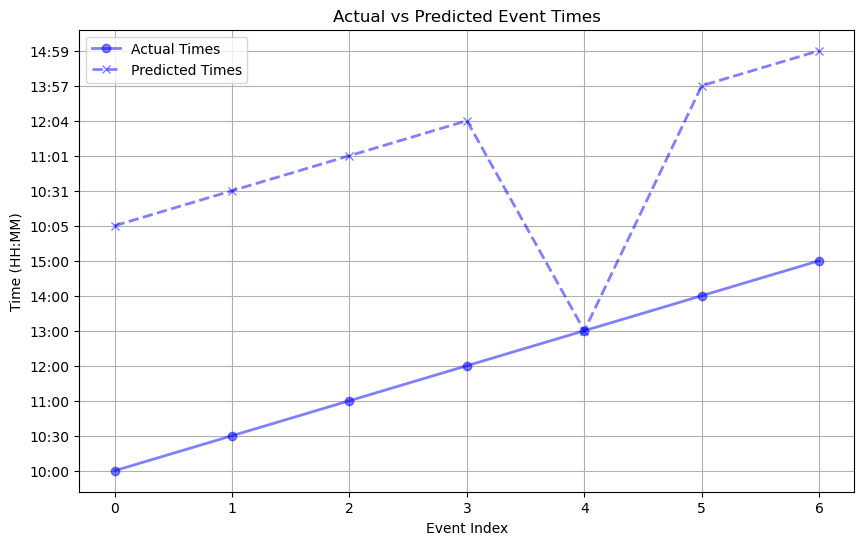

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 시간 데이터를 분 단위로 변환하는 함수
def time_to_minutes(time_str):
    hh, mm = map(int, time_str.split(':'))
    return hh * 60 + mm

# 분 단위의 시간을 HH:MM 형식으로 변환하는 함수
def minutes_to_time(minutes):
    hh = minutes // 60
    mm = minutes % 60
    return f"{int(hh):02d}:{int(mm):02d}"

# 시퀀스를 생성하는 함수
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 저장된 모델 로드
model = load_model('U-Keeper.keras')

# 데이터 준비 (예시 데이터 - 새로운 데이터 또는 기존 데이터)
data = pd.DataFrame({
    'time': ['08:00', '08:30', '09:15', '10:00', '10:30', '11:00', '12:00', '13:00', '14:00', '15:00'],
    'event_count': [1, 2, 1, 3, 2, 1, 4, 2, 1, 3]
})

# 시간을 분 단위로 변환
data['minutes'] = data['time'].apply(time_to_minutes)

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['minutes']])

# LSTM 모델을 위한 시퀀스 생성
SEQ_LENGTH = 3
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# 데이터를 (samples, timesteps, features) 형태로 reshape
X = X.reshape((X.shape[0], X.shape[1], 1))

# 추가 학습 (필요할 경우)
model.fit(X, y, batch_size=1, epochs=50, verbose=1)

# 예측 수행
predictions = model.predict(X)

# 예측 결과를 역변환하여 HH:MM 형식으로 변환
predictions = scaler.inverse_transform(predictions)
y = scaler.inverse_transform(y.reshape(-1, 1))

predicted_times = [minutes_to_time(int(pred)) for pred in predictions]
actual_times = [minutes_to_time(int(actual)) for actual in y]

# 성능 평가
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

# 정확도 계산 (오차가 적을수록 정확도는 100%에 가까워집니다)
accuracy = 100 - (mae / np.mean(y)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"Accuracy: {accuracy:.2f}%")

# 예측된 시간과 실제 시간을 출력
print("Actual times:", actual_times)
print("Predicted times:", predicted_times)

# 시각화
index = range(len(predicted_times))

plt.figure(figsize=(10, 6))

# 실제 시간과 예측된 시간을 같은 선으로 표시, 선을 약간 투명하게 설정
plt.plot(index, actual_times, marker='o', linestyle='-', color='blue', label='Actual Times', alpha=0.5, linewidth=2)
plt.plot(index, predicted_times, marker='x', linestyle='--', color='blue', label='Predicted Times', alpha=0.5, linewidth=2)

# 그래프 제목과 레이블 설정
plt.title('Actual vs Predicted Event Times')
plt.xlabel('Event Index')
plt.ylabel('Time (HH:MM)')
plt.xticks(index, index)
plt.grid(True)
plt.legend()

# 그래프 출력
plt.show()
